In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("C:/Users/MIT/Desktop/3rd Sem Dani/CSV files/C_data.csv")

In [8]:
data.shape

(569, 32)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [18]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())
print("\n \t Total diagnosis are {}, {} are malignant and {} are benign".format(diagnosis_all, diagnosis_categories[0], diagnosis_categories[1]))


 	 Total diagnosis are 569, 357 are malignant and 212 are benign


In [24]:
features_mean = list(data.columns[1:11])
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

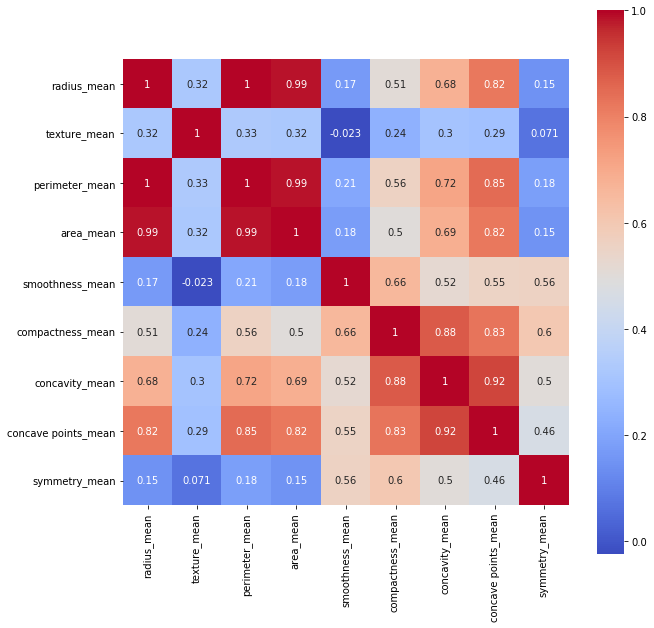

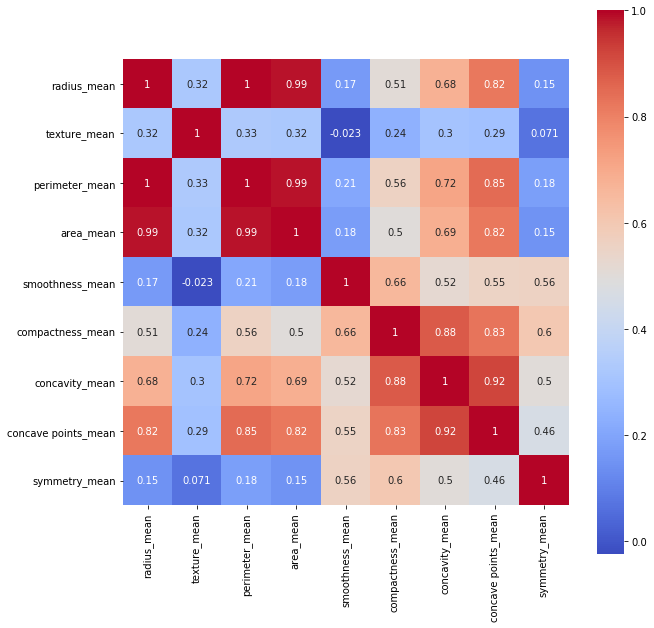

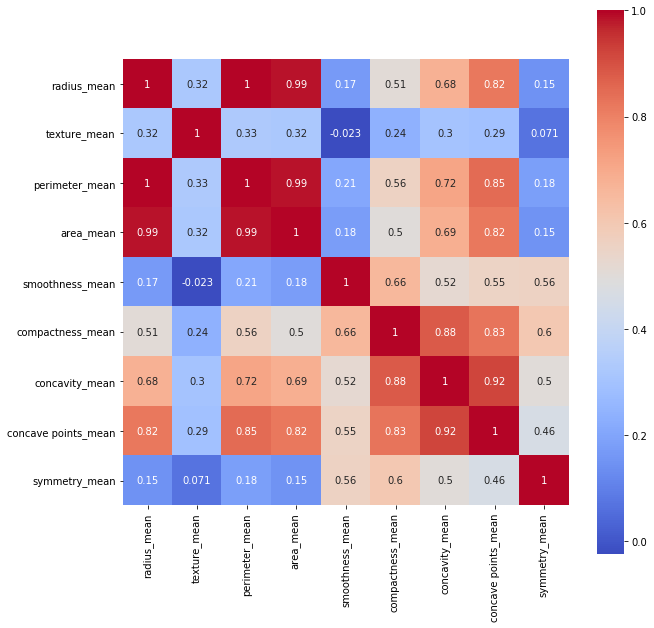

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(data[features_mean].corr(), annot = True, square = True, cmap = 'coolwarm')
plt.show()

C:\Users\MIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


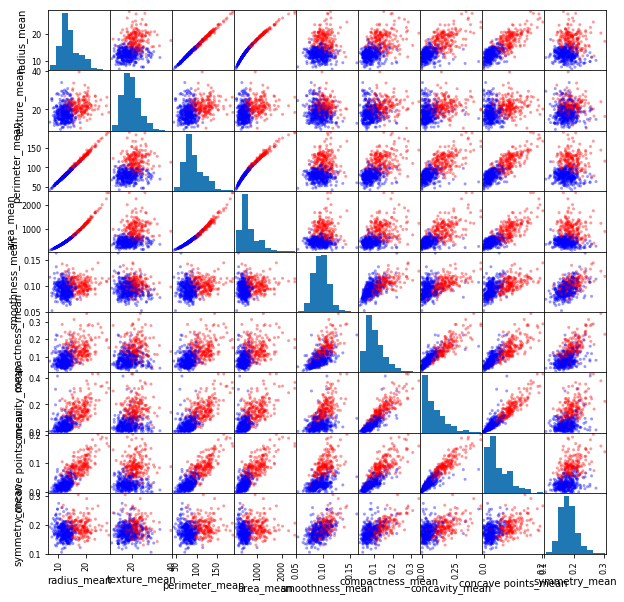

In [29]:
color_dic = {'M':'red', 'B':'blue'}
color = data['diagnosis'].map(lambda x: color_dic.get(x))
sm = pd.scatter_matrix(data[features_mean], c = color, alpha = 0.4, figsize = (10, 10)) 
plt.show()
    

In [32]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

In [34]:
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [36]:
x = data.loc[:, features_mean]
y = data.loc[:, 'diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

accuracy_all = []
cvs_all = []


In [49]:
data_1 = pd.DataFrame(data[features_mean])

In [51]:
data_1.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419


In [55]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 84.62%
Cross validation score: 62.11% (+/- 27.62%)
Execution time: 0.03398 seconds 



C:\Users\MIT\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\MIT\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\MIT\Anaconda3\lib\site-pack

In [64]:
from sklearn.svm import SVC, NuSVC, LinearSVC

start = time.time()

clf = SVC()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Classifier : {0:.25%}".format(accuracy_score(prediction, y_test)))
print("Cross Validation Score : {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time : {0:.5}seconds". format(end-start))

SVC Classifier : 69.2307692307692263966600876%
Cross Validation Score : 72.41% (+/- 4.70%)
Execution time : 0.23886seconds


In [77]:
start = time.time()

clf = NuSVC()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC classifer : {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross Validation Score : {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time : {0:.5}seconds".format(end-start))

NuSVC classifer : 72.03%
Cross Validation Score : 72.23% (+/- 3.91%)
Execution time : 0.22785seconds


In [82]:
start = time.time()
clf = LinearSVC()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC classifer : {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross Validation Score : {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time : {0:.5} seconds".format(end-start))

LinearSVC classifer : 78.32%
Cross Validation Score : 78.49% (+/- 40.35%)
Execution time : 0.24786 seconds
